In [1]:
 import os 
from zipfile import ZipFile
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split , StratifiedKFold, cross_val_score
from sklearn.svm import SVC


In [2]:
#extracting zipfile

filename = './expression_images_dataset.zip'
destination = './expressions'

with ZipFile(filename,'r') as zip:
    print('extracting files now ')
    if (not os.path.exists(destination)):
        zip.extractall(path=destination)
        print('done')
    else:
        print('destination directory already exists')

extracting files now 
destination directory already exists


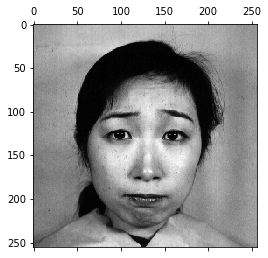

In [3]:
im = Image.open('./expressions/images/KA.SA3.35.tiff')
plt.matshow(im,cmap='gray')


In [4]:
df = pd.read_csv('./expressions/data.csv')

In [5]:
df.head()

,filepath,student,facial_expression
0,images/KA.AN1.39.tiff,KA,angry
1,images/KA.AN2.40.tiff,KA,angry
2,images/KA.AN3.41.tiff,KA,angry
3,images/KA.DI1.42.tiff,KA,disgust
4,images/KA.DI2.43.tiff,KA,disgust


In [6]:
df.shape

(213, 3)

In [7]:
len(df['facial_expression'].unique())

7

In [8]:
len(df['student'].value_counts())

9

## Data preparation for model building

In [9]:
X = []
for i in range(213) :
    path = './expressions/'+df.iloc[i][0]
    im = Image.open(path)
    im_array=np.array(im).reshape(65536)
    X.append(im_array)

In [10]:
len(X[0])

65536

In [11]:
y = df[['facial_expression']]

In [12]:
y.head()

,facial_expression
0,angry
1,angry
2,angry
3,disgust
4,disgust


In [13]:
X

[array([105, 102, 108, ..., 119, 113, 119], dtype=uint8),
 array([114, 115, 116, ..., 115, 105, 105], dtype=uint8),
 array([ 96,  98, 114, ..., 120, 116, 117], dtype=uint8),
 array([109, 118, 102, ..., 124, 138, 134], dtype=uint8),
 array([114, 118, 115, ..., 133, 130, 138], dtype=uint8),
 array([130, 128, 118, ..., 142, 141, 140], dtype=uint8),
 array([102, 114, 103, ..., 128, 127, 133], dtype=uint8),
 array([111, 113, 111, ..., 144, 134, 139], dtype=uint8),
 array([113, 116, 115, ..., 135, 142, 139], dtype=uint8),
 array([ 85,  82,  95, ..., 122, 127, 138], dtype=uint8),
 array([ 94,  92,  99, ..., 146, 148, 150], dtype=uint8),
 array([104, 111, 124, ..., 117, 121, 125], dtype=uint8),
 array([113, 105, 122, ..., 129, 142, 134], dtype=uint8),
 array([103,  89,  98, ..., 105,  96,  87], dtype=uint8),
 array([131, 135, 134, ..., 124, 130, 127], dtype=uint8),
 array([143, 140, 133, ..., 141, 121, 127], dtype=uint8),
 array([116, 102, 115, ...,  95, 100, 105], dtype=uint8),
 array([142, 1

In [14]:
len(X[0])

65536

In [15]:
y =df[['facial_expression']]

In [16]:
y.head()

,facial_expression
0,angry
1,angry
2,angry
3,disgust
4,disgust


In [17]:
ss = StandardScaler()

In [18]:
X = ss.fit_transform(X)   #feature scaling

In [19]:
X[0]

array([-0.43361499, -0.52131436, -0.41267217, ..., -0.09235734,
       -0.33892632, -0.09873761])

In [20]:
le = LabelEncoder()

In [21]:
y = le.fit_transform(y)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [22]:
y

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6,
       6, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6,
       6, 0, 0, 0, 1, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6,
       6, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 0,
       0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 0, 0,
       0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 0, 0, 0,
       1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 0, 0, 0, 1, 1,
       1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 0, 0, 0, 1, 1, 1,
       2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 0, 0, 0, 1, 1, 1, 2,
       2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6])

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

## Model Building

In [24]:
svm=SVC(kernel='linear')

In [25]:
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [26]:
svm.score(X_test,y_test)

0.7906976744186046

In [27]:
svm.score(X_train,y_train)

1.0

In [28]:
#stratified cross validation

sk=StratifiedKFold(n_splits=10,shuffle=True,random_state=50)

In [29]:
cross_val_score(estimator=svm,X=X,y=y,cv=sk)

array([1.        , 0.95454545, 0.95454545, 0.95238095, 0.95238095,
       0.9047619 , 0.85714286, 0.95238095, 0.9047619 , 0.85714286])

In [30]:
np.mean(cross_val_score(estimator=svm,X=X,y=y,cv=sk))

0.9290043290043292

In [31]:
np.std(cross_val_score(estimator=svm,X=X,y=y,cv=sk))

0.0441452325760231

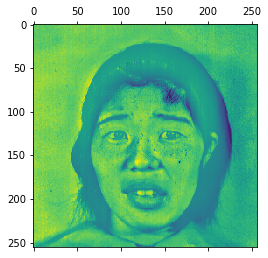

In [32]:
plt.matshow(X_test[8].reshape(256,256))

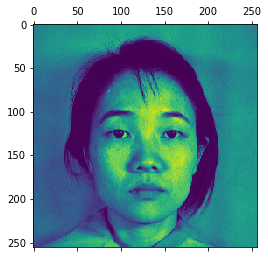

actualexpression : neutral
 predictedexpression : neutral


In [33]:
actual = le.inverse_transform([y_test[5]])
pred = svm.predict([X_test[5]])
pred_label = le.inverse_transform(pred)
output = ss.inverse_transform(X_test[5])
plt.matshow(output.reshape(256,256))
plt.show()
print(f'actualexpression : {actual[0]}\n predictedexpression : {pred_label[0]}')

In [34]:
y_test

array([1, 3, 1, 6, 5, 4, 4, 2, 2, 0, 1, 2, 2, 0, 1, 2, 0, 4, 5, 0, 4, 5,
       5, 3, 1, 0, 4, 4, 5, 2, 3, 0, 4, 2, 3, 6, 4, 4, 3, 6, 1, 1, 1])

In [35]:
le.inverse_transform([1])

array(['disgust'], dtype=object)